In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from lightgbm  import LGBMClassifier
from sklearn.decomposition import PCA

In [2]:
df_train = pd.read_csv("Data/train.csv")
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
target = df_train["Cover_Type"]
sns.pairplot(df_train[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']])

In [ ]:
sns.countplot(df_train[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',]])

In [ ]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile

In [31]:
df_train.dtypes


Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

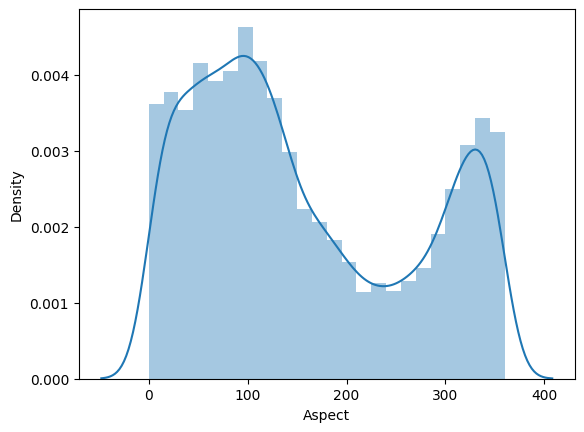

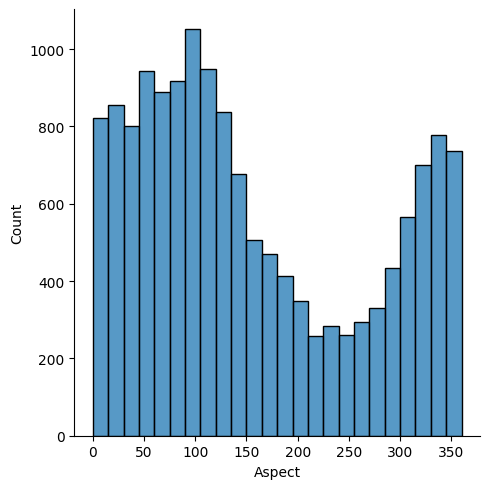

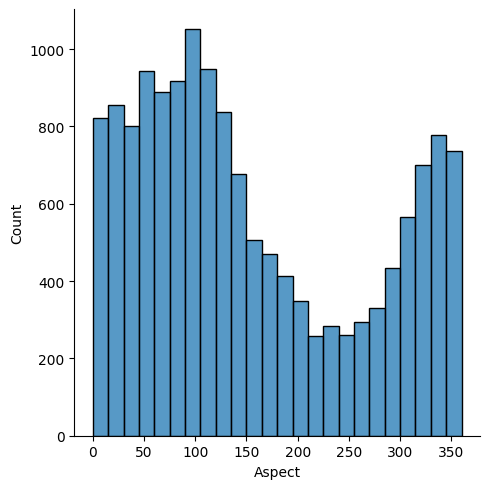

In [21]:
sns.displot(df_train["Aspect"])
plt.show()

In [32]:
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [7]:
X = df_train.drop(["Cover_Type"],axis=1)
y = df_train["Cover_Type"]
pca = PCA(n_components=20, svd_solver='full')
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

clf = make_pipeline(preprocessing.StandardScaler(),CatBoostClassifier(task_type="GPU") )
clf.fit(X_train,y_train)

Learning rate set to 0.104095
0:	learn: 1.7241842	total: 19.5ms	remaining: 19.5s
1:	learn: 1.5797735	total: 37.4ms	remaining: 18.7s
2:	learn: 1.4710858	total: 56.5ms	remaining: 18.8s
3:	learn: 1.3800516	total: 73.6ms	remaining: 18.3s
4:	learn: 1.3082338	total: 91.9ms	remaining: 18.3s
5:	learn: 1.2460420	total: 110ms	remaining: 18.2s
6:	learn: 1.1864653	total: 127ms	remaining: 18s
7:	learn: 1.1365415	total: 145ms	remaining: 18s
8:	learn: 1.0924238	total: 162ms	remaining: 17.9s
9:	learn: 1.0540230	total: 178ms	remaining: 17.6s
10:	learn: 1.0189565	total: 195ms	remaining: 17.6s
11:	learn: 0.9886270	total: 213ms	remaining: 17.5s
12:	learn: 0.9612609	total: 230ms	remaining: 17.5s
13:	learn: 0.9387022	total: 247ms	remaining: 17.4s
14:	learn: 0.9181784	total: 262ms	remaining: 17.2s
15:	learn: 0.8995973	total: 278ms	remaining: 17.1s
16:	learn: 0.8782101	total: 293ms	remaining: 17s
17:	learn: 0.8600053	total: 308ms	remaining: 16.8s
18:	learn: 0.8421107	total: 323ms	remaining: 16.7s
19:	learn: 0

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x00000233B8EC49D0>)])

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
clf = make_pipeline(preprocessing.StandardScaler(),CatBoostClassifier(max_depth=10,n_estimators=700,random_state=0,task_type="GPU") )
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

Learning rate set to 0.140107
0:	learn: 1.6712680	total: 92.8ms	remaining: 1m 4s
1:	learn: 1.4917524	total: 197ms	remaining: 1m 8s
2:	learn: 1.3543950	total: 310ms	remaining: 1m 11s
3:	learn: 1.2370796	total: 479ms	remaining: 1m 23s
4:	learn: 1.1465598	total: 604ms	remaining: 1m 23s
5:	learn: 1.0655094	total: 708ms	remaining: 1m 21s
6:	learn: 1.0008392	total: 811ms	remaining: 1m 20s
7:	learn: 0.9467987	total: 910ms	remaining: 1m 18s
8:	learn: 0.8968952	total: 1s	remaining: 1m 16s
9:	learn: 0.8565178	total: 1.09s	remaining: 1m 15s
10:	learn: 0.8150978	total: 1.17s	remaining: 1m 13s
11:	learn: 0.7806390	total: 1.24s	remaining: 1m 11s
12:	learn: 0.7505389	total: 1.34s	remaining: 1m 10s
13:	learn: 0.7214712	total: 1.42s	remaining: 1m 9s
14:	learn: 0.6948295	total: 1.5s	remaining: 1m 8s
15:	learn: 0.6701266	total: 1.58s	remaining: 1m 7s
16:	learn: 0.6502704	total: 1.67s	remaining: 1m 7s
17:	learn: 0.6309847	total: 1.77s	remaining: 1m 7s
18:	learn: 0.6134896	total: 1.85s	remaining: 1m 6s
19:

0.8733466933867735

In [9]:
# Model Accuracy, how often is the classifier correct?
x_newtest = pd.read_csv("C:\\Users\\teuta\\Desktop\\Forest-Cover-Prediction\\Data\\test-full.csv")
x_ntest = pca.transform(x_newtest)
y_pred = clf.predict(x_ntest)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred

array([[5],
       [5],
       [2],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [10]:
full_submission = pd.read_csv("C:\\Users\\teuta\\Desktop\\Forest-Cover-Prediction\\Data\\full_submission.csv")
full_submission.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,5
3,4,4
4,5,5


In [11]:
full_submission["Cover_Type"] = y_pred

In [12]:
full_submission.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,5
4,5,5


In [13]:
full_submission.to_csv("full_submission_PCA.csv", index=False)